## Dataset Info.

- This dataset contains 3 classes of 50 instances for each
- Each class refer to iris plant type
- One class is separable from other 2
- The latter are not linearly separable from each other

**- Attribute info:-**

- Sepal length and width in cm
- Petal length and width in cm
- classes:-
     - Iris setosa
     - Iris Versicolour
     - Iris Verginica

## Import Relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
dataset = pd.read_csv("Iris.csv")

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = dataset.copy()

## Exploratory Data Analysis

In [5]:
df = df.drop(columns = ["Id"])

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

<AxesSubplot:>

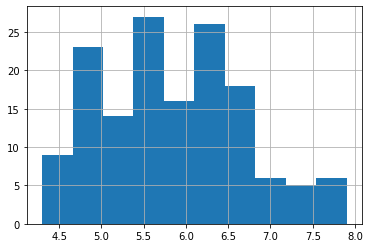

In [13]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

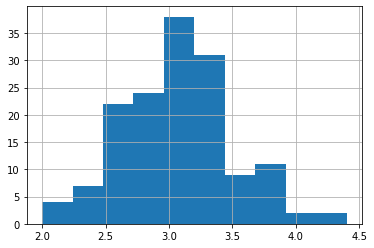

In [14]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

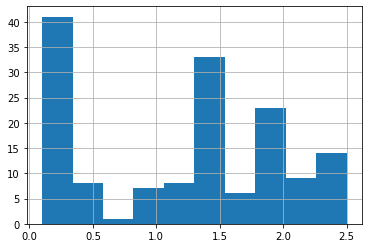

In [15]:
df['PetalWidthCm'].hist()

<AxesSubplot:>

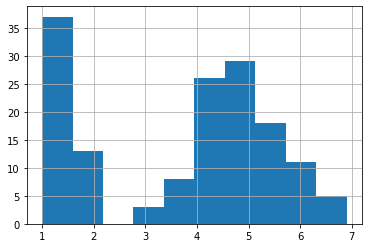

In [16]:
df['PetalLengthCm'].hist()

In [17]:
# scatterplot
colors = ['red', 'blue', 'green']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

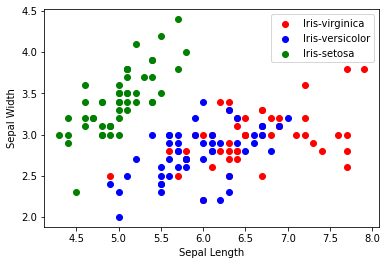

In [18]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

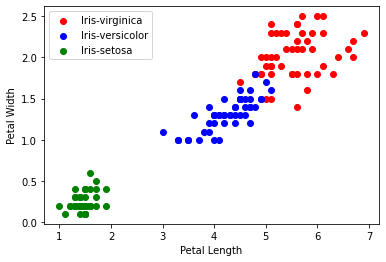

In [19]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

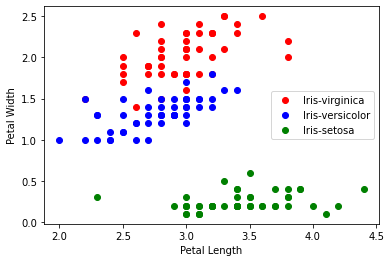

In [22]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

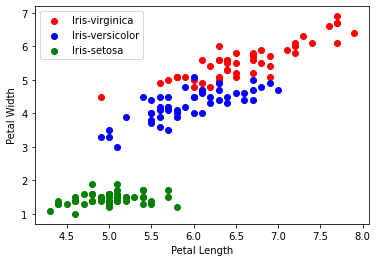

In [24]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

## Correlation matrix

In [28]:
corr = df.corr()

<AxesSubplot:>

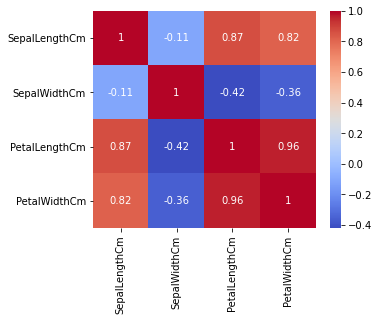

In [29]:
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

## Label Encoder

- Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

## LDA

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
# now train dataset to reduce the dimensionality
X_train = lda.fit_transform(x_train, y_train)
X_test = lda.transform(x_test)

## Model Training

In [41]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [42]:
LR.fit(x_train, y_train)

C:\Users\Peter\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Confusion Matrix and Accuracy Score

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = LR.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


1.0